File exists and is readable.


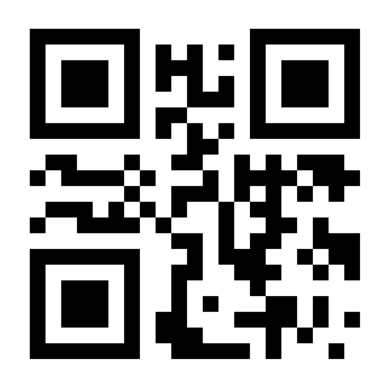

QR Code data: ['Kunal Verma']


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode  

def check_file_access(file_path):
    if not os.path.exists(file_path):
        print(f"Error: The file at {file_path} does not exist.")
        return False

    if not os.access(file_path, os.R_OK):
        print(f"Error: The file at {file_path} is not readable (permission issue).")
        return False

    print("File exists and is readable.")
    return True

def load_image(file_path):
    if not check_file_access(file_path):
        return None

    image = cv2.imread(file_path)
    if image is None:
        print("Error: Could not open or find the image.")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    return image

def decode_qr_code(image):
    decoded_objects = decode(image)
    qr_data = []
    for obj in decoded_objects:
        if obj.type == 'QRCODE': 
            qr_data.append(obj.data.decode('utf-8'))
    return qr_data

def decode_barcode(image):
    decoded_objects = decode(image)
    barcode_data = []
    for obj in decoded_objects:
        if obj.type != 'QRCODE': 
            barcode_data.append(obj.data.decode('utf-8'))
    return barcode_data

def decode_image(image):
    if image is None:
        print("No image to decode.")
        return

    qr_data = decode_qr_code(image)
    barcode_data = decode_barcode(image)

    if qr_data:
        print("QR Code data:", qr_data)
    if barcode_data:
        print("Barcode data:", barcode_data)
    if not qr_data and not barcode_data:
        print("No QR code or barcode data found.")

file_path = r'C:\Users\kunal\Downloads\Untitled.png'  
image = load_image(file_path)
decode_image(image)